### Room Occupancy Clustering Approach

The dataset under consideration pertains to an empirical study involving occupancy estimation within an enclosed room environment. The experimental setting encompasses a room measuring 6 meters in length and 4.6 meters in width, which was equipped with a sensor network infrastructure. In this controlled experiment, data was meticulously collected over a duration of four days, during which the room's occupancy exhibited fluctuations ranging from an absence of individuals to a maximum of three occupants.

**Sensor Configuration and Data Collection:**

The experimental configuration involved the deployment of seven sensor nodes, strategically arranged in a star configuration, along with one designated as an edge node. Data transmission from the sensor nodes to the edge node occurred wirelessly at regular intervals of 30 seconds. It is noteworthy that throughout the data collection process, no Heating, Ventilation, and Air Conditioning (HVAC) systems were in operation, ensuring a stable ambient environment.

**Sensor Types and Calibration:**

The dataset encompasses readings from five distinct types of non-intrusive sensors, each serving a unique monitoring function. These sensors are as follows:
1. Temperature Sensor
2. Light Sensor
3. Sound Sensor
4. CO2 Sensor
5. Digital Passive Infrared (PIR) Sensor

Notably, calibration procedures were applied to select sensors within the dataset. Calibration for the CO2 sensor involved an initial zero-point calibration stage, which required the sensor to be placed within a pristine environment for a duration exceeding 20 minutes. Subsequently, calibration was finalized by activating the calibration pin (HD pin) for a minimum of 7 seconds. Likewise, the sound sensor, functioning akin to a microphone with an integrated variable-gain analog amplifier, necessitated meticulous adjustment of the amplifier's gain using a potentiometer to attain maximum sensitivity. The PIR sensor, characterized by its two trimpots, was configured for sensitivity and duration adjustment subsequent to motion detection. Notably, both trimpots were set to their highest values.

**Research Objectives and Clustering Goals:**

The principal aim of this investigation is to harness the power of clustering analysis, specifically employing the k-means algorithm, to discern inherent patterns and insights embedded within the multifaceted dataset. The salient research objectives encompass the following:

1. **Pattern Identification:** The primary objective is to uncover and delineate discernible patterns in sensor data that closely correspond to different states of room occupancy. It is essential to ascertain whether the k-means clustering technique can effectively partition the dataset into clusters that represent an empty room, low occupancy, and high occupancy scenarios.

2. **Anomaly Detection:** In the process of analysis, special attention will be devoted to the detection of anomalies or outliers within the dataset. Such outliers, if identified, could potentially signify exceptional events or environmental conditions within the room.

3. **Sensor Data Relationships:** Another key research facet involves investigating the interrelationships among different sensors both within and across the derived clusters. The inquiry seeks to identify consistent sensor reading combinations that co-occur within specific occupancy scenarios.

4. **Resource Optimization:** As an overarching objective, this study will explore the practical implications of the clustering results, particularly in the context of resource allocation optimization. This pertains to scenarios where the dataset forms a part of broader systems, such as building management, wherein the occupancy patterns could inform decisions regarding resource allocation and utilization, encompassing aspects such as heating, ventilation, and lighting.

In conclusion, the application of k-means clustering to this dataset is undertaken with the overarching goal of delving into the intricacies of room occupancy dynamics, sensor interactions, and the potential ramifications for various applications, including energy efficiency, security, and environmental control within enclosed spaces.

[^1] Singh,Adarsh Pal and Chaudhari,Sachin. (2023). Room Occupancy Estimation. UCI Machine Learning Repository. https://doi.org/10.24432/C5P605.

**The K-Means Clustering Algorithm: A Comprehensive Overview**

The K-Means algorithm stands as a cornerstone technique within the realm of unsupervised machine learning and data clustering. Its fundamental objective is to partition a given dataset into distinct clusters based on inherent similarities among data points. Within the academic context, it is imperative to elucidate the algorithm's intricacies, encompassing its procedural steps and the underlying assumptions that govern its application.

**Procedural Steps of K-Means:**

1. **Initialization:** The K-Means algorithm commences with the initialization of 'k' centroids, representing the initial centers of the clusters. These centroids are typically chosen at random from the dataset or through other heuristic methods. It is important to underscore that the choice of initial centroids can significantly impact the final clustering outcome.

2. **Assignment of Data Points:** Subsequently, each data point in the dataset is assigned to the cluster whose centroid is closest in terms of Euclidean distance. This assignment step is a pivotal aspect of the algorithm and serves to create initial clusters based on proximity.

3. **Update Centroids:** Following the assignment of data points to clusters, the centroids of each cluster are recalculated. This involves computing the mean of all data points within each cluster, thereby positioning the centroid at the center of its associated cluster. This step reflects an iterative refinement process.

4. **Convergence Check:** The algorithm iteratively repeats the assignment and centroid update steps until convergence is attained. Convergence is generally determined by evaluating whether the assignment of data points to clusters remains unchanged or undergoes only marginal changes between successive iterations.

5. **Termination:** The K-Means algorithm culminates when convergence is achieved or when a predefined number of iterations is reached. At this juncture, the algorithm outputs the final cluster assignments, whereby each data point is assigned to one of the 'k' clusters.

**Assumptions of K-Means:**

K-Means relies on certain assumptions and characteristics of the underlying data, which are essential considerations within the academic discourse:

1. **Cluster Spherical Shape:** One primary assumption is that the clusters within the dataset exhibit a spherical or globular shape. This implies that the distance between data points and the centroid is computed in Euclidean space, assuming isotropic clusters.

2. **Equal Cluster Size:** The algorithm further assumes that the clusters are of approximately equal size, signifying that each cluster accommodates a comparable number of data points. In cases where clusters possess unequal sizes, the algorithm may not perform optimally.

3. **Independence of Features:** K-Means operates under the assumption of feature independence, implying that it treats each feature or dimension as equally significant in the clustering process. Consequently, it may not be adept at handling datasets where feature interdependencies significantly impact clustering.

In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.figure_factory as ff


## ANALYSIS AND FINDINGS

In [180]:
df = pd.read_csv("Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [182]:
categorical_columns = ['S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']
df[categorical_columns] = df[categorical_columns].astype('category')

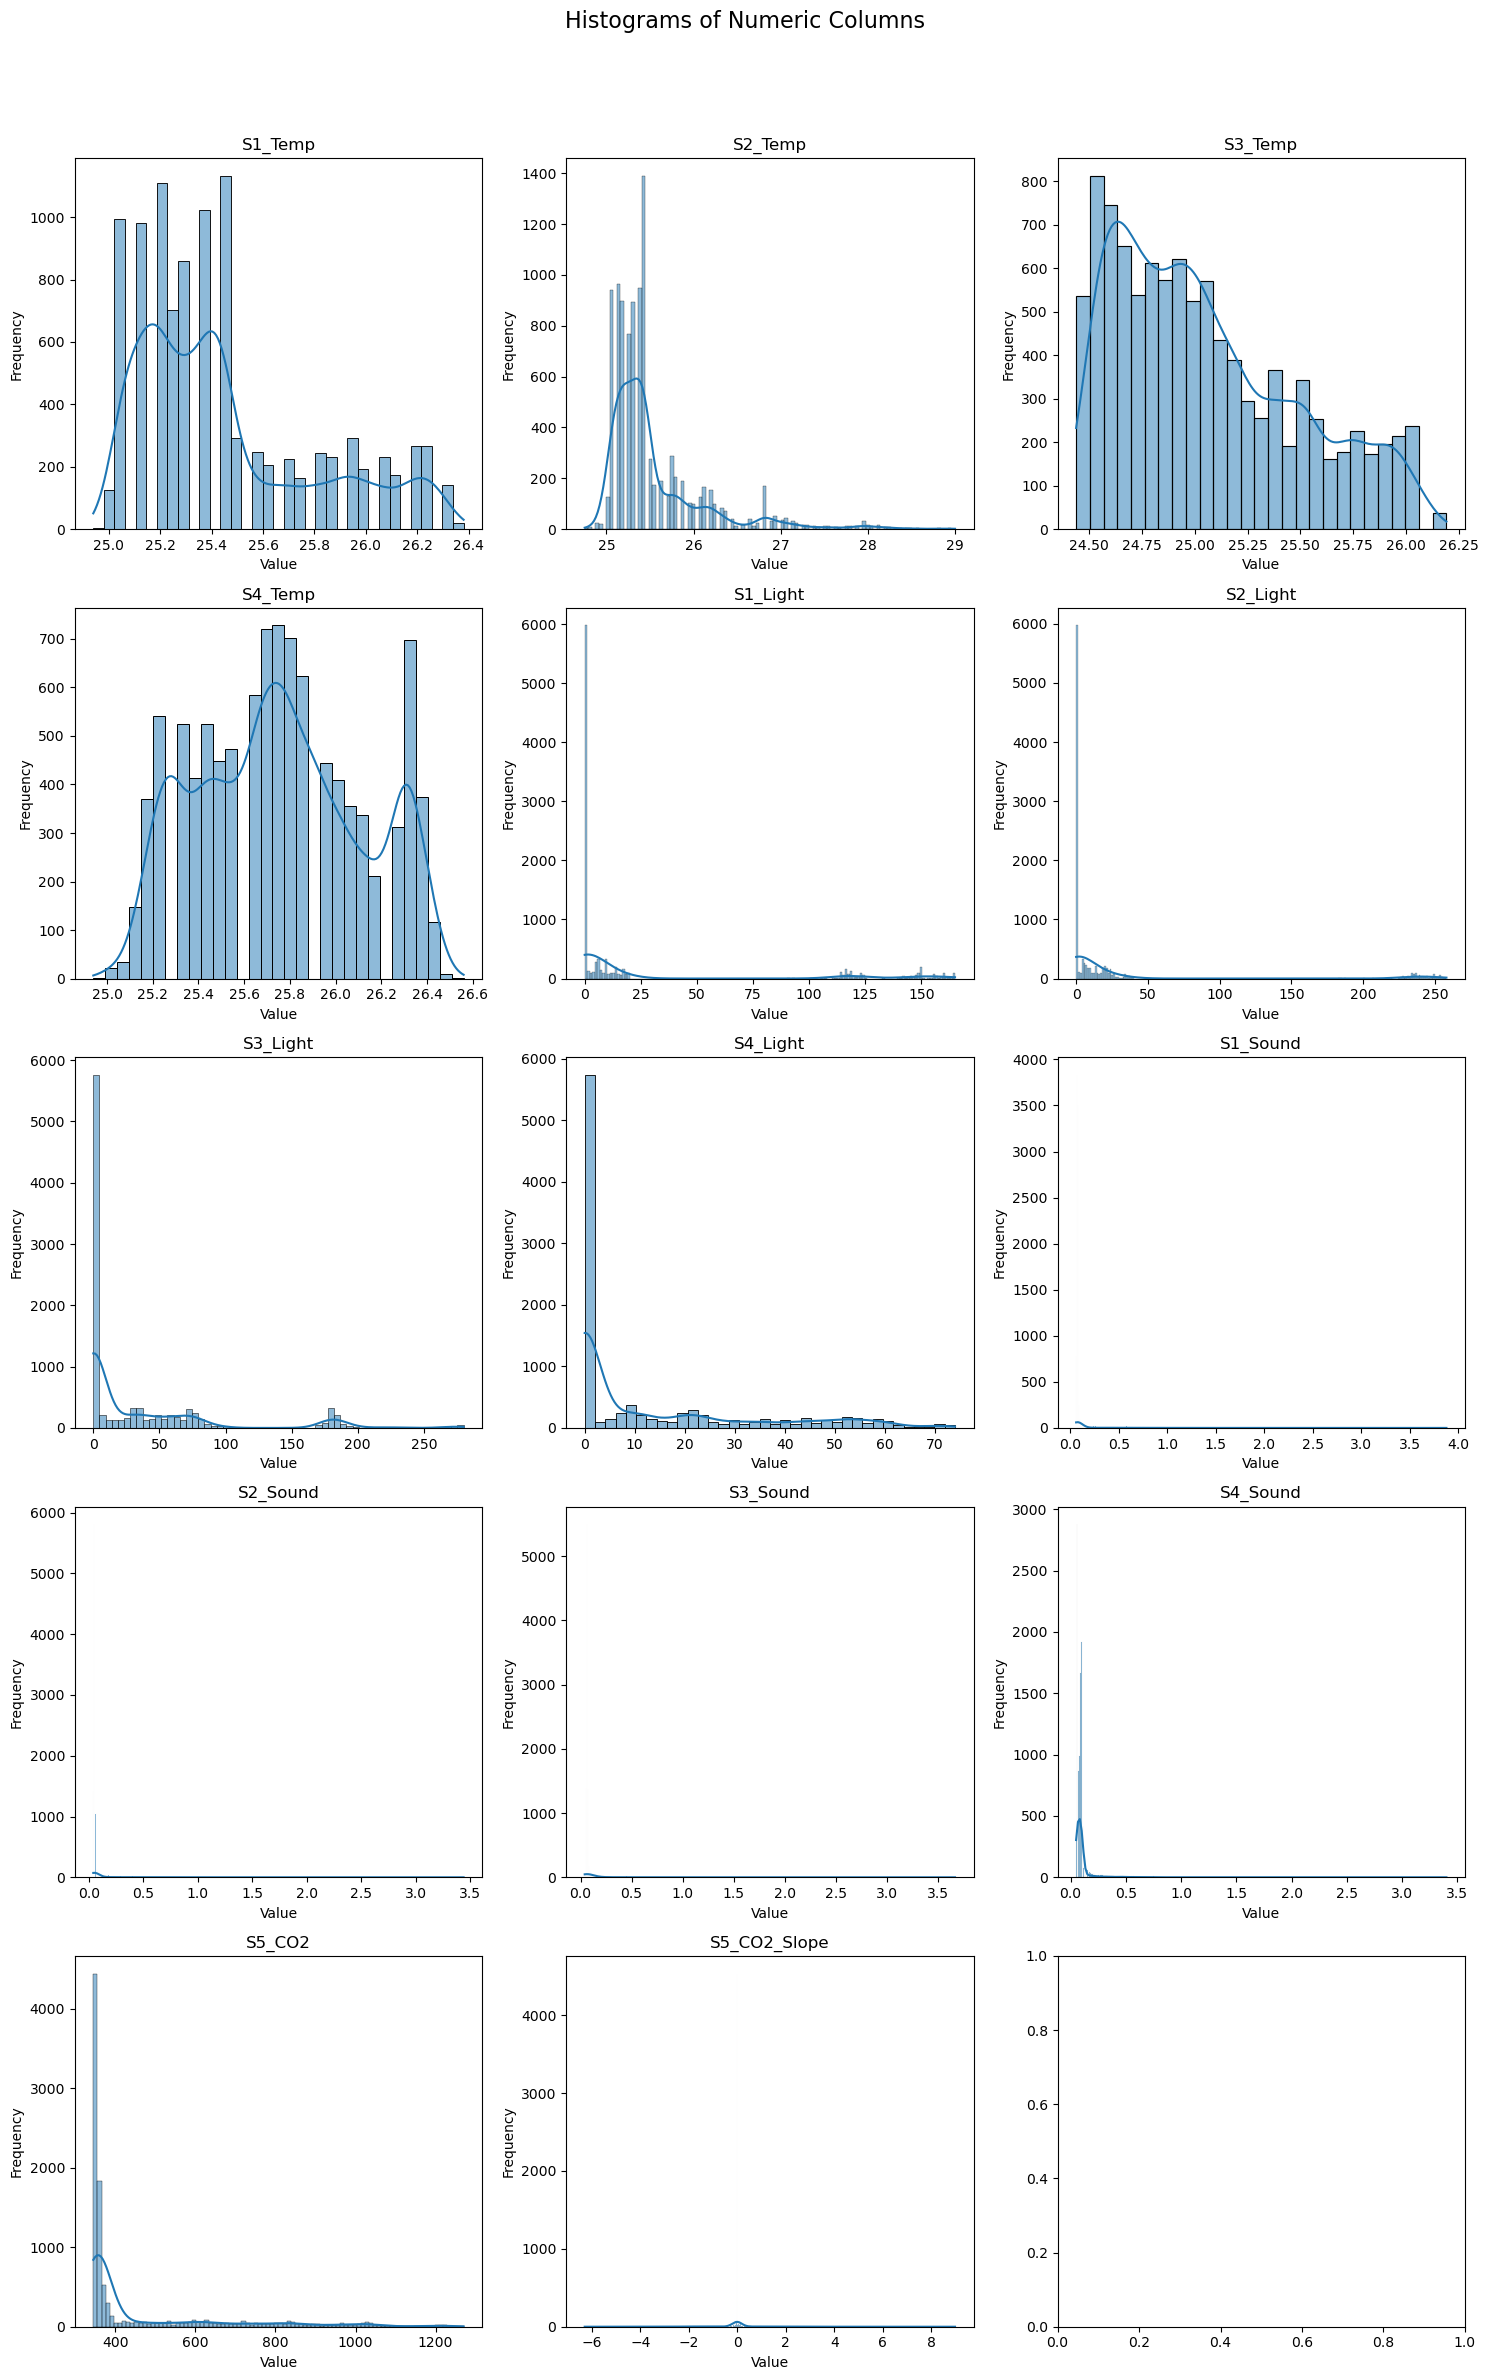

In [183]:
# Extract numeric columns
numeric_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope']

# Create a grid of histograms
num_plots = len(numeric_columns)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Calculate suitable bin size for the histogram
    bin_size = 10  # Default bin size
    if df[column].max() != df[column].min():
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        bin_width = 2 * iqr * (len(df[column]) ** (-1/3))  # Freedman-Diaconis rule
        if bin_width > 0:
            bin_size = int((df[column].max() - df[column].min()) / bin_width)
    
    sns.histplot(df[column], ax=ax, kde=True, bins=bin_size)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


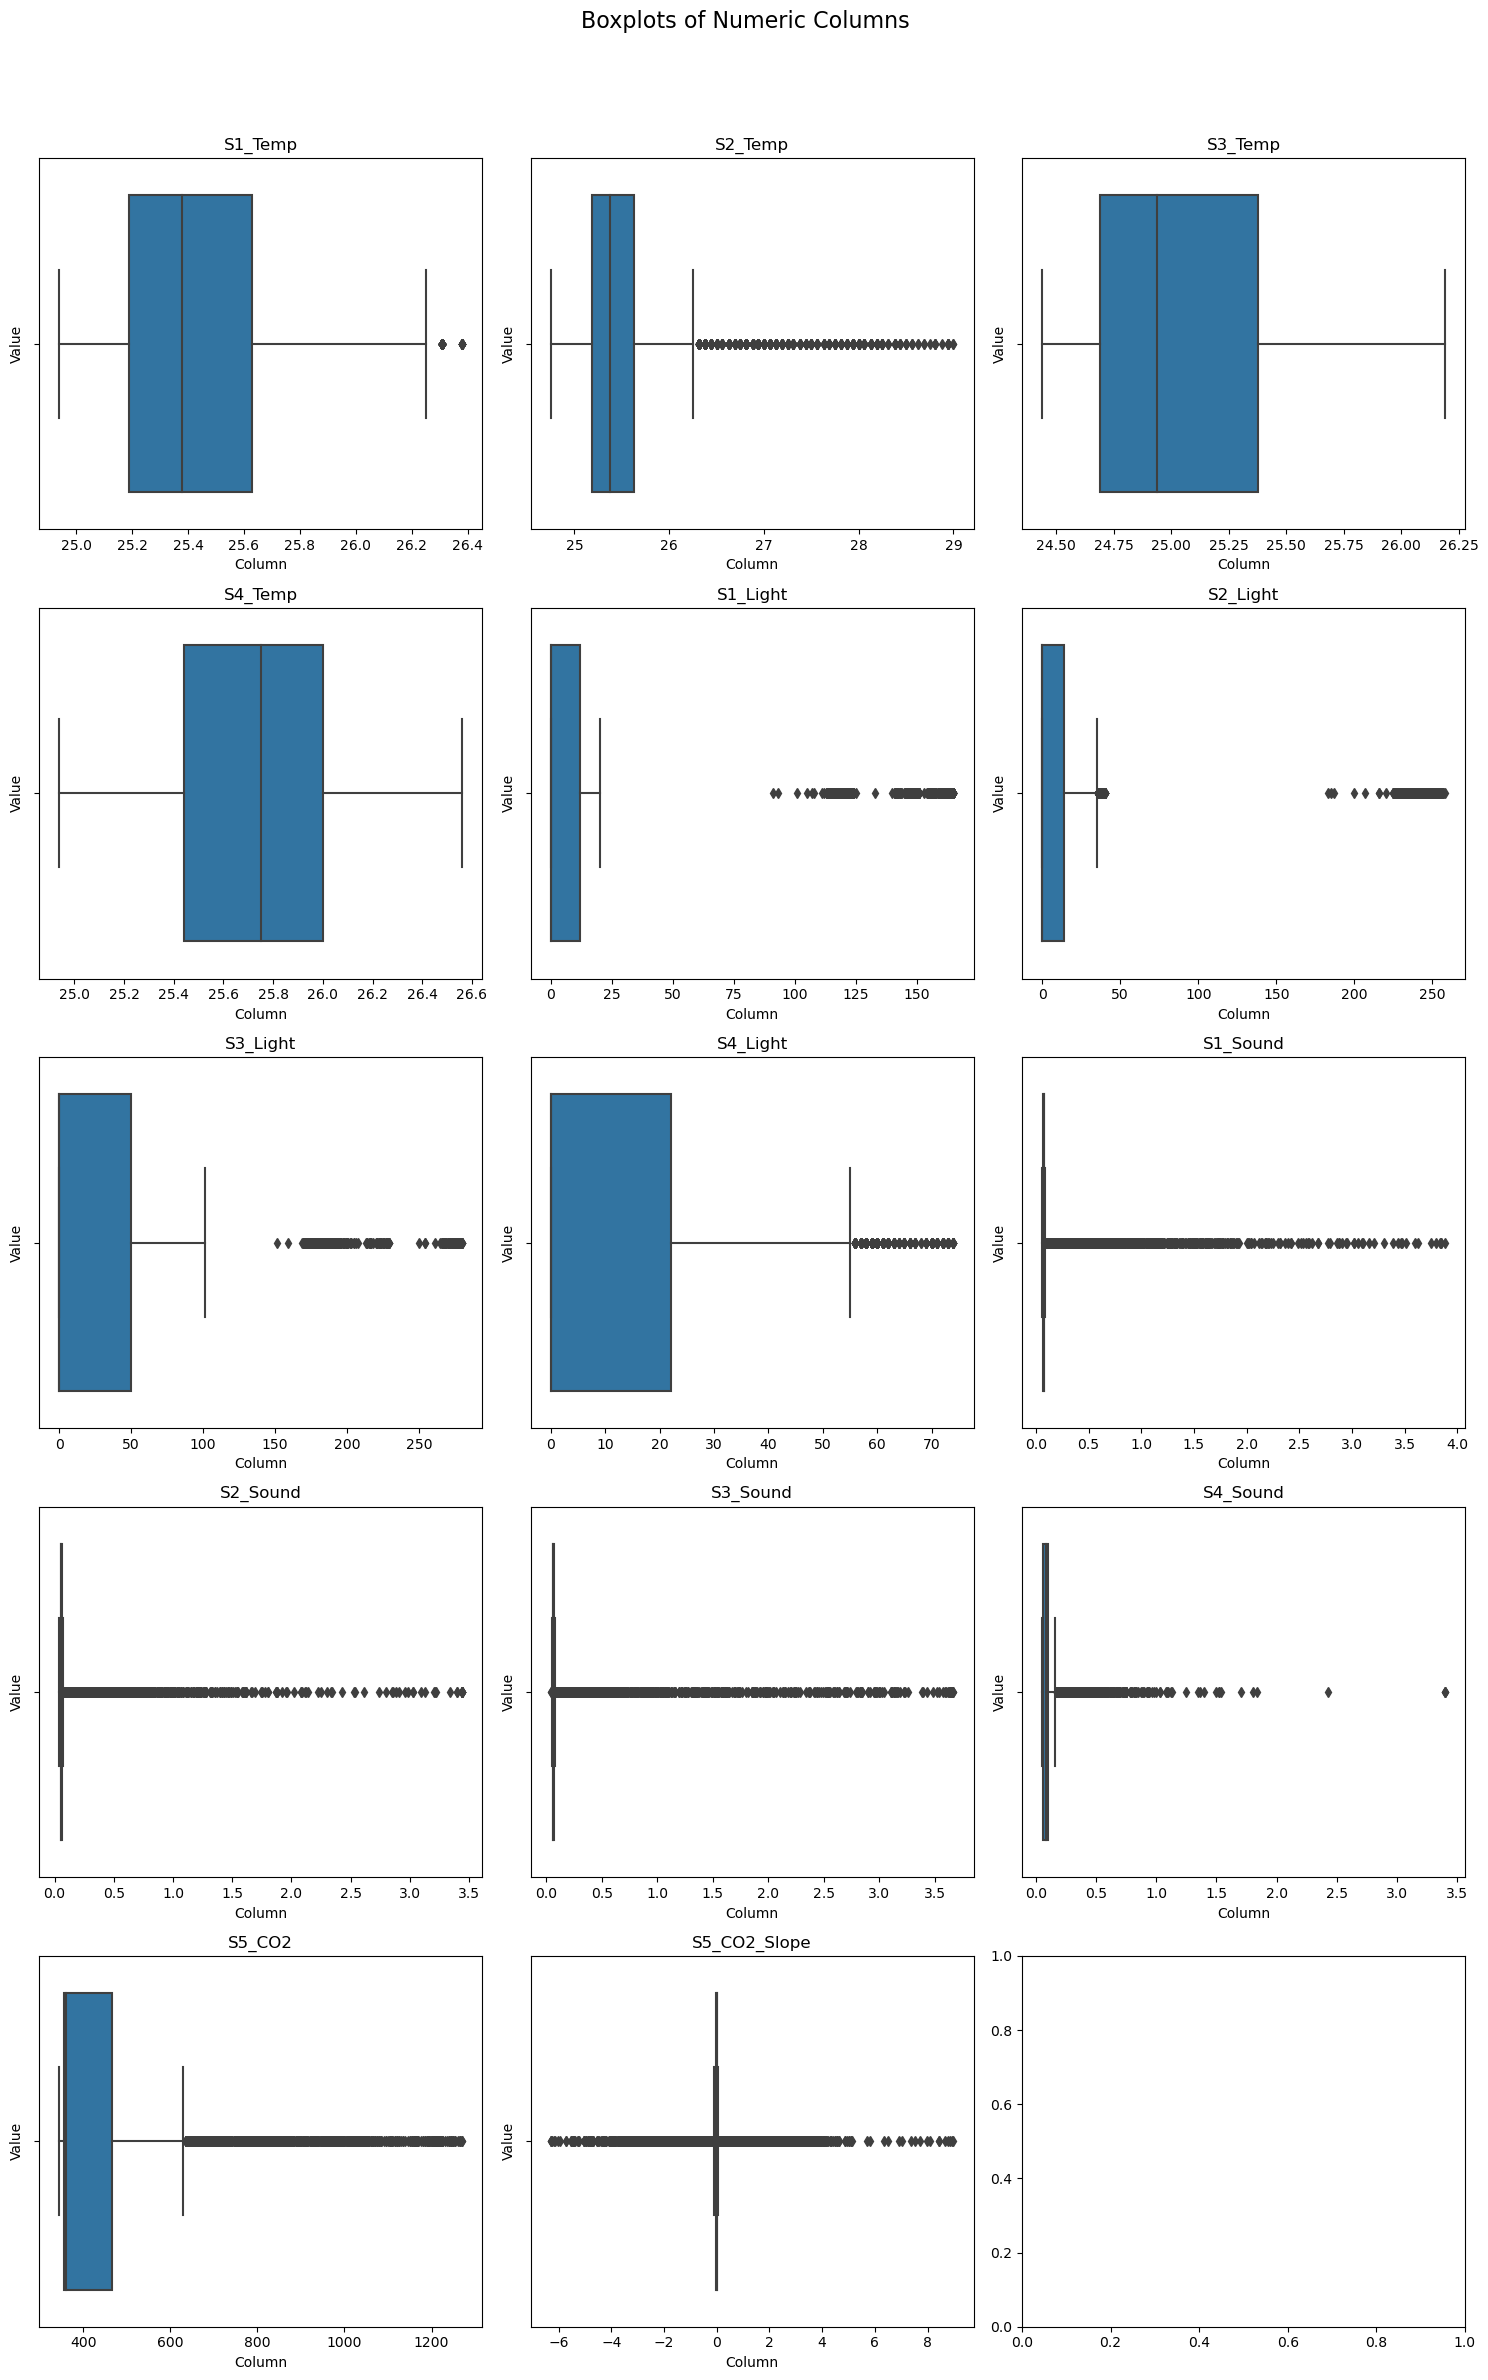

In [184]:
# Extract numeric columns
numeric_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope']

# Create a grid of boxplots
num_plots = len(numeric_columns)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Boxplots of Numeric Columns', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Column')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


## Feature Extraction

In [185]:
# Extract hour and minute features from the time column
df['Time'] = pd.to_datetime(df['Time'])  # Convert 'Time' column to datetime format
df['Hour'] = df['Time'].dt.hour  # Extract hour
df['Minute'] = df['Time'].dt.minute  
# Extract minute
# Combine 'Date' and 'Time' columns into a single datetime column
#df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set the new datetime column as the index
#df.set_index('Datetime', inplace=True)

# Drop the original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

df.head()


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Minute
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,10,49
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,10,50
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,10,50
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,10,51
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,10,51


### Data Preprocessing

In [186]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler


cols_to_drop = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound','S5_CO2_Slope']

df = df.drop(columns=cols_to_drop)


# Select numerical columns for standardization
numerical_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
                     'S3_Light', 'S4_Light', 'S5_CO2', 'Minute']

# Standardize the selected numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Minute
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.354382,0,0,1,10,1.121835
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,-0.354382,0,0,1,10,1.179517
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0,0,1,10,1.179517
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0,0,1,10,1.237200
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,-0.354382,0,0,1,10,1.237200


In [187]:
df['S7_PIR'].value_counts()

0    9323
1     806
Name: S7_PIR, dtype: int64

In [188]:
df['S6_PIR'].value_counts()

0    9216
1     913
Name: S6_PIR, dtype: int64

In [189]:
df['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

### Model Fitting

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

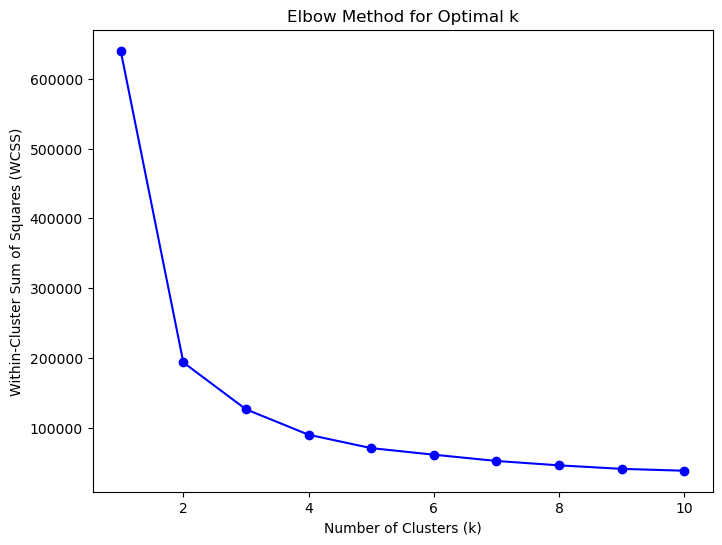

In [190]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans

# Calculate WCSS for a range of k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)  # Fit the model
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [201]:
# Based on the elbow method, choose an appropriate value for k (e.g., 3)
k = 3
# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Minute,Cluster
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.354382,0,0,1,10,1.121835,1
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,-0.354382,0,0,1,10,1.179517,1
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0,0,1,10,1.179517,1
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0,0,1,10,1.237200,1
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,-0.354382,0,0,1,10,1.237200,1


In [197]:
# Import silhouette_score from scikit-learn
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5286547139036539


### Interpretation

Enhanced Clustering Quality: A Silhouette Score around 0.52 is generally considered quite good for clustering analysis. It suggests that the selected features are highly relevant for creating meaningful and well-separated clusters within the data.

Optimal k-Value: The score also reflects the appropriateness of the chosen value of 'k' (number of clusters) based on the selected features. The clusters are well-differentiated and exhibit substantial separation.

Promising Insights: The Silhouette Score implies that the clusters formed are highly indicative of the underlying patterns in the data. This may lead to more insightful and accurate interpretations of the data, especially in the context of your research objectives.

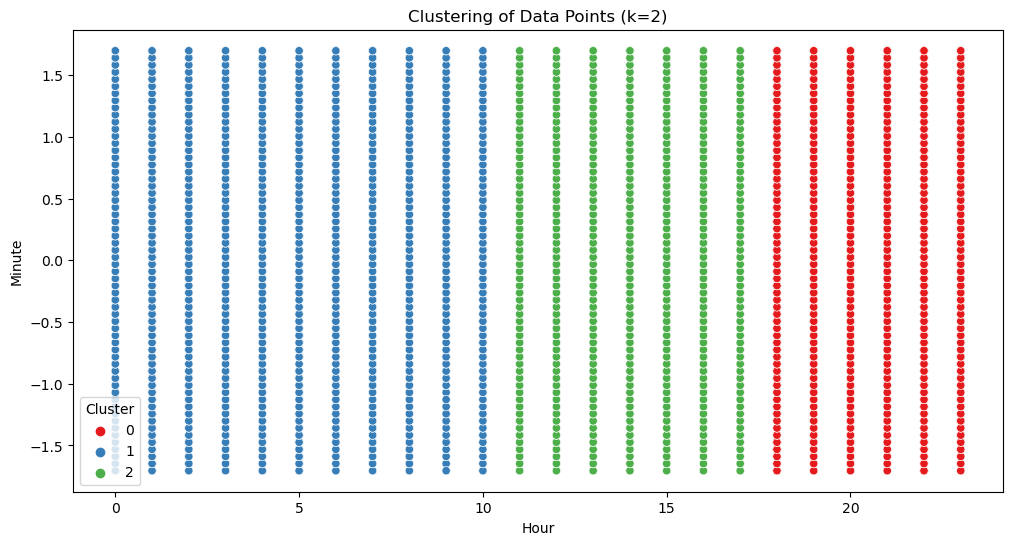

In [202]:
import seaborn as sns

# Visualize the clusters based on selected features
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hour', y='Minute', hue='Cluster', palette='Set1')
plt.title('Clustering of Data Points (k=2)')
plt.xlabel('Hour')
plt.ylabel('Minute')
plt.legend(title='Cluster')
plt.show()


C:\Users\RodgersOsumo\AppData\Local\Temp\ipykernel_3952\1084097127.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.drop('Room_Occupancy_Count', axis=1).groupby('Cluster').mean()


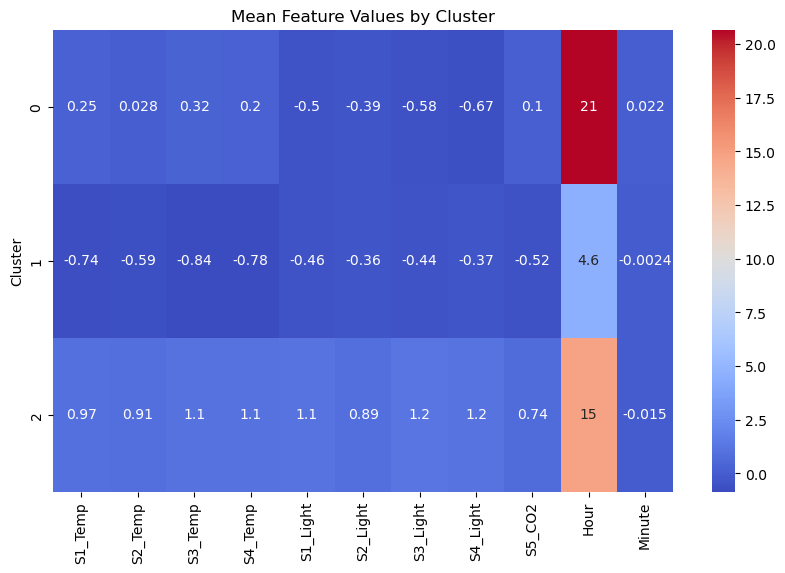

In [205]:
# Calculate the mean values of selected features for each cluster
cluster_means = df.drop('Room_Occupancy_Count', axis=1).groupby('Cluster').mean()

# Visualize the mean values of selected features
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Mean Feature Values by Cluster')
plt.show()


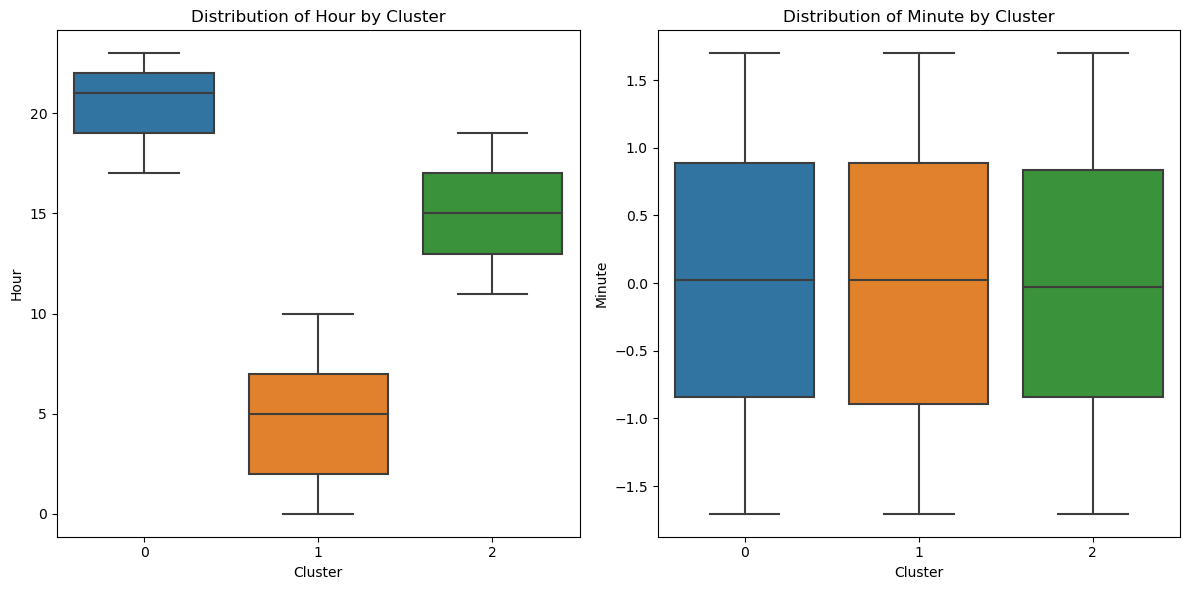

In [206]:
# Create subplots for 'hour' and 'minute' distributions by cluster
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of 'hour' by cluster
sns.boxplot(data=df, x='Cluster', y='Hour', ax=axes[0])
axes[0].set_title('Distribution of Hour by Cluster')

# Distribution of 'minute' by cluster
sns.boxplot(data=df, x='Cluster', y='Minute', ax=axes[1])
axes[1].set_title('Distribution of Minute by Cluster')

plt.tight_layout()
plt.show()


These boxplots illustrate the distribution of 'hour' and 'minute' values within each cluster, allowing you to observe temporal patterns and variations between the two clusters.

By analyzing these visualizations and exploring the distribution of 'hour' and 'minute' values within each cluster, you can uncover insights into temporal patterns in room occupancy and better understand how the data points are distributed between the clusters. This analysis can provide valuable insights into when and how occupancy patterns vary within the room.

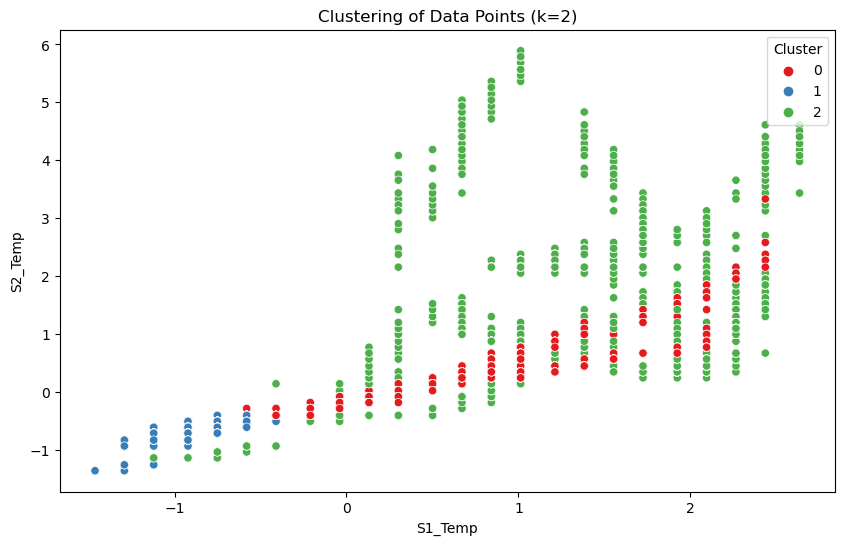

In [207]:
import matplotlib.pyplot as plt

# Visualize the clusters based on selected features (example: S1_Temp vs. S2_Temp)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='S1_Temp', y='S2_Temp', hue='Cluster', palette='Set1')
plt.title('Clustering of Data Points (k=2)')
plt.xlabel('S1_Temp')
plt.ylabel('S2_Temp')
plt.legend(title='Cluster')
plt.show()


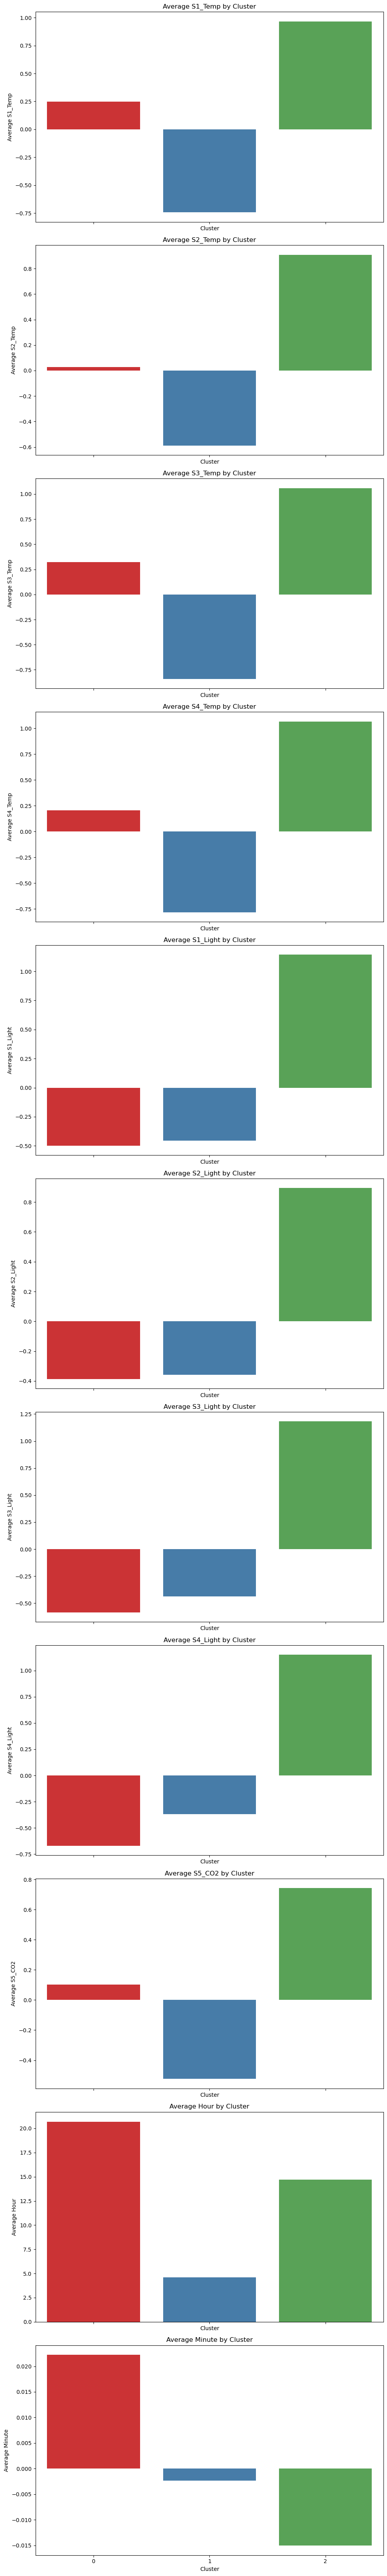

In [211]:
import matplotlib.pyplot as plt

# List of numerical columns (excluding 'Cluster' if it exists)
numerical_cols = [col for col in df.columns if col != 'Cluster' and df[col].dtype in ['int64', 'float64']]

# Calculate mean feature values by cluster for each numerical column
cluster_means = df.groupby('Cluster')[numerical_cols].mean()

# Create subplots for each feature
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 6 * len(numerical_cols)), sharex=True)

# Visualize the mean values of each numerical feature for each cluster
for i, col in enumerate(numerical_cols):
    sns.barplot(data=cluster_means, x=cluster_means.index, y=col, ax=axes[i], palette='Set1')
    axes[i].set_title(f'Average {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()



**Question 1: Can we identify distinct patterns of sensor data associated with different levels of room occupancy?**

- The clustering analysis with k = 3 has indeed identified three distinct clusters of sensor data.
- Cluster 0 cluster 2 and Cluster 1 represent different patterns of sensor data associated with room occupancy.

**Question 2: Explore whether certain clusters are associated with specific times of the day or recurring temporal patterns.**

Cluster 1 is associated with hours 00hrs to 1000hrs, Cluster 2 is associated with the hours 1100hrs and 1700hrs and the 3rd cluster is associated with 1800hrs to midnight